In [214]:
import numpy as np
import pandas as pd
import matplotlib as plt
import json
import string
import matplotlib.pyplot as plt

In [215]:
train_file = 'train-v2.0.json'
dev_file = 'dev-v2.0.json'

In [216]:
with open(train_file) as json_file:
    data = json.load(json_file)
    data = data["data"]

In [ ]:
from transformers import AutoModelForQuestionAnswering



In [217]:
s = "string. With. Punctuation?"
s = s.lower()
s = s.translate(str.maketrans('', '', string.punctuation))

In [154]:
def filter_impossible(qas):
    if qas['is_impossible'] == True:
        return False
    else:
        return True

for k in range(0,len(data)):
    for j in range(0,len(data[k]['paragraphs'])):
        data[k]['paragraphs'][j]['qas'] = list(filter(filter_impossible, data[k]['paragraphs'][j]['qas']))

In [188]:
def standardization(s):
    s = s.lower()
    s = s.translate(str.maketrans('', '', string.punctuation))
    return s

def answers_standardization(answers):
    for i in range(0,len(answers)):
        answers[i]['text'] = standardization(answers[i]['text'])

def qas_standardization(qas):
    for i in range(0,len(qas)):
        qas[i]['question'] = standardization(qas[i]['question'])
        answers_standardization(qas[i]['answers'])

def paragraphs_standardization(paragraphs):
    for i in range(0,len(paragraphs)):
        paragraphs[i]['context'] = standardization(paragraphs[i]['context'])
        qas_standardization(paragraphs[i]['qas'])

def topic_standardization(topics):
    for i in range(0,len(topics)):
        paragraphs_standardization(topics[i]['paragraphs'])

topic_standardization(data)

In [190]:
test_data = data[0]['paragraphs']
print(test_data[0])
print()
print(test_data[0]['qas'][0])
print()
print(test_data[0]['qas'][0]['question'])
print()
print(test_data[0]['qas'][0]['answers'][0]['text'])
print()
print(test_data[0]['context'])

{'qas': [{'question': 'when did beyonce start becoming popular', 'id': '56be85543aeaaa14008c9063', 'answers': [{'text': 'in the late 1990s', 'answer_start': 269}], 'is_impossible': False}, {'question': 'what areas did beyonce compete in when she was growing up', 'id': '56be85543aeaaa14008c9065', 'answers': [{'text': 'singing and dancing', 'answer_start': 207}], 'is_impossible': False}, {'question': 'when did beyonce leave destinys child and become a solo singer', 'id': '56be85543aeaaa14008c9066', 'answers': [{'text': '2003', 'answer_start': 526}], 'is_impossible': False}, {'question': 'in what city and state did beyonce  grow up ', 'id': '56bf6b0f3aeaaa14008c9601', 'answers': [{'text': 'houston texas', 'answer_start': 166}], 'is_impossible': False}, {'question': 'in which decade did beyonce become famous', 'id': '56bf6b0f3aeaaa14008c9602', 'answers': [{'text': 'late 1990s', 'answer_start': 276}], 'is_impossible': False}, {'question': 'in what rb group was she the lead singer', 'id': '5

In [196]:
count_words = {}

def count_the_words(counts, string):
    words = string.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

for i in range(0,len(data)):
    for j in range(0,len(data[i]['paragraphs'])):
        count_the_words(count_words, data[i]['paragraphs'][j]['context'])

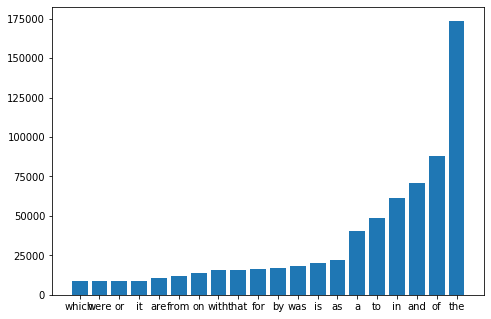

In [211]:
count_words = {k: v for k, v in sorted(count_words.items(), key=lambda item: item[1])}
x = list(count_words.keys())[-20:]
y = [count_words[i] for i in x]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [213]:
len(data)

442